In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [299]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Get the Data
df = pd.read_csv('networkintrusion.csv')

#View the first 5 rows of data
df.head(5)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983.0,0.0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20.0,0.0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0.0,15.0,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [5]:
#View the last 5 rows of data
df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
22539,0,tcp,smtp,SF,794.0,333.0,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317.0,938.0,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540.0,8314.0,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,anomaly
22542,0,udp,domain_u,SF,42.0,42.0,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal
22543,0,tcp,sunrpc,REJ,0.0,0.0,0,0,0,0,...,21,0.08,0.03,0.00,0.00,0.00,0.0,0.44,1.00,anomaly


In [6]:
# understand shape and size of data 
print(df.shape)
print (df.size)

(22544, 40)
901760


In [7]:
#Get a summary of the numerical columns in the data
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.253800e+04,2.253800e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039812e+04,2.055584e+03,0.000311,0.008428,0.000710,0.105394,0.021647,0.442202,0.119899,...,193.869411,140.750532,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.728493e+05,2.122190e+04,0.017619,0.142599,0.036473,0.928428,0.150328,0.496659,7.269597,...,94.035663,111.783972,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#get more information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22538 non-null  float64
 5   dst_bytes                    22538 non-null  float64
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [9]:
#Get the number of missing values in each column
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      6
dst_bytes                      6
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
num_root                       0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          9
srv_count                      9
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_s

In [10]:
# Get the initial data with dropping the NA values
df = df.dropna()

#Get the shape of the dataframe after removing the null values
df.shape

(22529, 40)

In [95]:
#get the summary of data after removing the missing values
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22529.000000,2.252900e+04,2.252900e+04,22529.000000,22529.000000,22529.000000,22529.000000,22529.000000,22529.000000,22529.000000,...,22529.000000,22529.000000,22529.000000,22529.000000,22529.000000,22529.000000,22529.000000,22529.000000,22529.000000,22529.000000
mean,219.004794,1.039981e+04,2.054350e+03,0.000311,0.008434,0.000710,0.105375,0.021617,0.442141,0.119934,...,193.859292,140.718940,0.608600,0.090547,0.132213,0.019643,0.097834,0.099447,0.233492,0.226785
std,1407.633674,4.729436e+05,2.122490e+04,0.017625,0.142646,0.036485,0.928648,0.150235,0.496652,7.272014,...,94.037923,111.783377,0.435693,0.220700,0.306201,0.085417,0.273153,0.281886,0.387282,0.400937
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,167.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
#finding the correlation between columns of the dataframe
corr_matrix=df.corr().abs()

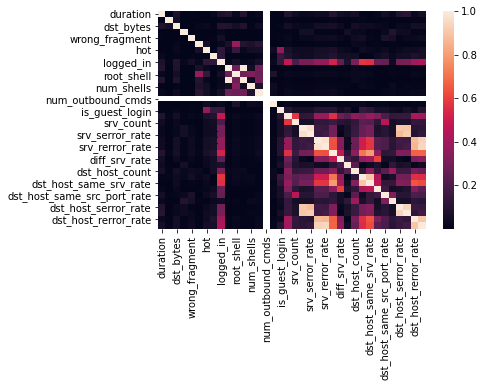

In [112]:
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr().abs())
  
# displaying heatmap
plt.show()

In [115]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

In [196]:
#the columns which have high correlation are dropped

to_drop


['num_root',
 'srv_serror_rate',
 'srv_rerror_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [250]:


train, test = train_test_split(df, test_size=0.3, random_state=42, shuffle=False)



In [268]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,class
0,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,0.0,1.00,0.04,0.06,0.00,255,0.06,0.00,0.00,anomaly
1,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,0.0,1.00,0.01,0.06,0.00,255,0.06,0.00,0.00,anomaly
2,2,tcp,ftp_data,SF,12983.0,0.0,0,0,0,0,...,0.0,0.00,1.00,0.00,0.00,134,0.04,0.61,0.02,normal
3,0,icmp,eco_i,SF,20.0,0.0,0,0,0,0,...,0.0,0.00,1.00,0.00,1.00,3,0.00,1.00,0.28,anomaly
4,1,tcp,telnet,RSTO,0.0,15.0,0,0,0,0,...,0.0,1.00,1.00,0.00,0.75,29,0.17,0.03,0.02,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15780,283,tcp,ftp,SF,159.0,597.0,0,0,0,2,...,0.0,0.00,1.00,0.00,0.00,255,0.03,0.00,0.00,anomaly
15781,0,tcp,smtp,SF,1658.0,480.0,0,0,0,0,...,0.0,0.00,1.00,0.00,0.00,2,0.00,0.50,0.01,normal
15782,0,tcp,other,REJ,0.0,0.0,0,0,0,0,...,0.0,1.00,1.00,0.00,0.00,255,0.02,0.00,0.00,anomaly
15783,2069,tcp,http,RSTR,101764.0,0.0,0,0,0,0,...,0.0,0.67,1.00,0.00,0.00,255,0.02,0.00,0.00,anomaly


In [309]:
test


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,class
15785,0,tcp,http_443,S0,0.0,0.0,0,0,0,0,...,0.79,0.21,0.10,0.06,0.00,255,0.05,0.00,0.00,anomaly
15786,938,tcp,http,RSTR,24064.0,0.0,0,0,0,0,...,0.07,0.93,1.00,0.00,0.00,255,0.00,0.00,0.00,anomaly
15787,1,tcp,smtp,SF,2599.0,293.0,0,0,0,0,...,0.00,0.00,1.00,0.00,0.00,255,0.16,0.00,0.00,anomaly
15788,1,tcp,imap4,RSTO,0.0,44.0,0,0,0,0,...,0.00,1.00,0.50,1.00,1.00,255,0.03,0.00,0.00,anomaly
15789,4,tcp,pop_3,SF,30.0,93.0,0,0,0,0,...,0.00,0.00,1.00,0.00,0.00,255,0.04,0.00,0.00,anomaly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794.0,333.0,0,0,0,0,...,0.00,0.00,1.00,0.00,0.00,100,0.06,0.01,0.01,normal
22540,0,tcp,http,SF,317.0,938.0,0,0,0,0,...,0.00,0.00,1.00,0.00,0.18,197,0.00,0.01,0.01,normal
22541,0,tcp,http,SF,54540.0,8314.0,0,0,0,2,...,0.00,0.00,1.00,0.00,0.20,255,0.00,0.00,0.00,anomaly
22542,0,udp,domain_u,SF,42.0,42.0,0,0,0,0,...,0.00,0.00,1.00,0.00,0.33,255,0.01,0.00,0.00,normal


Feature Scaling

In [284]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

Encoding Categorical Atrributes

In [289]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrainX = train.select_dtypes(include=['object']).copy()
cattestX = test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrainX.apply(encoder.fit_transform)
testcat = cattestX.apply(encoder.fit_transform)


# separate target column from encoded data 
enctrain = traincat.drop(['class'], axis=1)
cat_Ytrain = traincat[['class']].copy()


In [290]:
train_x1 = pd.concat([sc_traindf,traincat],axis=1)
train_x1= train_x1.dropna()

In [320]:

train_x = train_x1.drop(['class'],axis=1)
train_y = train_x1[['class']].copy()
train_x.shape

(15755, 30)

In [326]:
testcat = testcat.reset_index()
testcat= testcat.drop(['index','class'],axis=1)


In [327]:
test_df = pd.concat([sc_testdf,testcat],axis=1)


In [324]:
test_df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,protocol_type,service,flag,class
0,-0.147070,-0.030078,-0.094619,-0.027208,-0.061295,-0.016321,-0.139490,-0.140567,-0.885352,-0.041917,...,-0.128829,-0.391693,0.647879,-0.187200,-0.426416,-0.232157,1,23,4,0
1,0.458574,0.030605,-0.094619,-0.027208,-0.061295,-0.016321,-0.139490,-0.140567,1.129494,-0.041917,...,-0.363376,-0.391693,0.647879,-0.411160,-0.426416,-0.232157,1,22,3,0
2,-0.146425,-0.023524,-0.081609,-0.027208,-0.061295,-0.016321,-0.139490,-0.140567,1.129494,-0.041917,...,-0.363376,-0.391693,0.647879,0.305512,-0.426416,-0.232157,1,49,8,0
3,-0.146425,-0.030078,-0.092665,-0.027208,-0.061295,-0.016321,-0.139490,-0.140567,-0.885352,-0.041917,...,3.545737,3.532606,0.647879,-0.276784,-0.426416,-0.232157,1,24,2,0
4,-0.144488,-0.030002,-0.090489,-0.027208,-0.061295,-0.016321,-0.139490,-0.140567,1.129494,-0.041917,...,-0.363376,-0.391693,0.647879,-0.231992,-0.426416,-0.232157,1,43,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6754,-0.147070,-0.028076,-0.079833,-0.027208,-0.061295,-0.016321,-0.139490,-0.140567,1.129494,-0.041917,...,-0.363376,-0.391693,-0.996468,-0.142408,-0.393599,-0.116352,1,49,8,1
6755,-0.147070,-0.029278,-0.052969,-0.027208,-0.061295,-0.016321,-0.139490,-0.140567,1.129494,-0.041917,...,-0.363376,0.314681,0.032575,-0.411160,-0.393599,-0.116352,1,22,8,1
6756,-0.147070,0.107457,0.274545,-0.027208,-0.061295,-0.016321,2.494062,-0.140567,1.129494,0.886987,...,-0.363376,0.393167,0.647879,-0.411160,-0.426416,-0.232157,1,22,8,0
6757,-0.147070,-0.029972,-0.092754,-0.027208,-0.061295,-0.016321,-0.139490,-0.140567,-0.885352,-0.041917,...,-0.363376,0.903326,0.647879,-0.366368,-0.426416,-0.232157,2,11,8,1


In [293]:
train_x.shape

(15755, 30)

In [294]:
train_y.shape


(15755, 1)

Feature Selection


<ipython-input-295-d5565434ee1a>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_x, train_y);


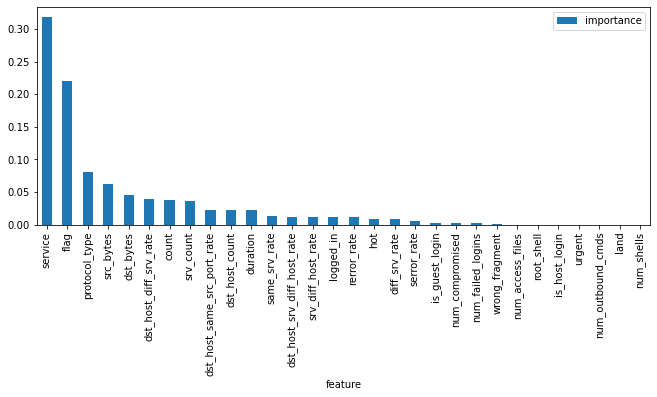

In [295]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_x, train_y);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [300]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=15)
rfe = rfe.fit(train_x, train_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['duration',
 'src_bytes',
 'dst_bytes',
 'count',
 'srv_count',
 'rerror_rate',
 'same_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'protocol_type',
 'service',
 'flag']

In [301]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(train_x,train_y,train_size=0.70, random_state=2)

In [303]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

Model Ivaluation

In [304]:
from sklearn import metrics

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.6627682627646428

Model Accuracy:
 0.6627675009067827

Confusion matrix:
 [[4431 1876]
 [1843 2878]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.71      0.70      0.70      6307
         1.0       0.61      0.61      0.61      4721

    accuracy                           0.66     11028
   macro avg       0.66      0.66      0.66     11028
weighted avg       0.66      0.66      0.66     11028



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9190250809128049

Model Accuracy:
 0.9976423648893725

Confusion matrix:
 [[6301    6]
 [  20 4701]]

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6307
         1.0       1.00      1.00     

Validating Model

In [305]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()     


============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.6608842817854876

Confusion matrix:
 [[1879  795]
 [ 808 1245]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.70      0.70      0.70      2674
         1.0       0.61      0.61      0.61      2053

    accuracy                           0.66      4727
   macro avg       0.65      0.65      0.65      4727
weighted avg       0.66      0.66      0.66      4727



============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.92088005077216

Confusion matrix:
 [[2484  190]
 [ 184 1869]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      2674
         1.0       0.91      0.91      0.91      2053

    accuracy                           0.92      4727
   macro avg       0.92    

In [312]:
test_df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,protocol_type,service,flag,class
0,-0.147070,-0.030078,-0.094619,-0.027208,-0.061295,-0.016321,-0.13949,-0.140567,-0.885352,-0.041917,...,-0.128829,-0.391693,0.647879,-0.187200,-0.426416,-0.232157,NaN,NaN,NaN,NaN
1,0.458574,0.030605,-0.094619,-0.027208,-0.061295,-0.016321,-0.13949,-0.140567,1.129494,-0.041917,...,-0.363376,-0.391693,0.647879,-0.411160,-0.426416,-0.232157,NaN,NaN,NaN,NaN
2,-0.146425,-0.023524,-0.081609,-0.027208,-0.061295,-0.016321,-0.13949,-0.140567,1.129494,-0.041917,...,-0.363376,-0.391693,0.647879,0.305512,-0.426416,-0.232157,NaN,NaN,NaN,NaN
3,-0.146425,-0.030078,-0.092665,-0.027208,-0.061295,-0.016321,-0.13949,-0.140567,-0.885352,-0.041917,...,3.545737,3.532606,0.647879,-0.276784,-0.426416,-0.232157,NaN,NaN,NaN,NaN
4,-0.144488,-0.030002,-0.090489,-0.027208,-0.061295,-0.016321,-0.13949,-0.140567,1.129494,-0.041917,...,-0.363376,-0.391693,0.647879,-0.231992,-0.426416,-0.232157,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,49.0,8.0,1.0
22540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22.0,8.0,1.0
22541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22.0,8.0,0.0
22542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,11.0,8.0,1.0


In [313]:
sc_testdf

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,-0.147070,-0.030078,-0.094619,-0.027208,-0.061295,-0.016321,-0.139490,-0.140567,-0.885352,-0.041917,...,-0.204924,2.290528,-0.067035,-1.540848,-0.128829,-0.391693,0.647879,-0.187200,-0.426416,-0.232157
1,0.458574,0.030605,-0.094619,-0.027208,-0.061295,-0.016321,-0.139490,-0.140567,1.129494,-0.041917,...,-0.019753,-0.117489,1.661225,0.634554,-0.363376,-0.391693,0.647879,-0.411160,-0.426416,-0.232157
2,-0.146425,-0.023524,-0.081609,-0.027208,-0.061295,-0.016321,-0.139490,-0.140567,1.129494,-0.041917,...,-0.309082,-0.351602,-0.571111,0.634554,-0.363376,-0.391693,0.647879,0.305512,-0.426416,-0.232157
3,-0.146425,-0.030078,-0.092665,-0.027208,-0.061295,-0.016321,-0.139490,-0.140567,-0.885352,-0.041917,...,-0.297509,-0.351602,1.829251,-0.574003,3.545737,3.532606,0.647879,-0.276784,-0.426416,-0.232157
4,-0.144488,-0.030002,-0.090489,-0.027208,-0.061295,-0.016321,-0.139490,-0.140567,1.129494,-0.041917,...,-0.332229,-0.351602,-0.571111,0.634554,-0.363376,-0.391693,0.647879,-0.231992,-0.426416,-0.232157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6754,-0.147070,-0.028076,-0.079833,-0.027208,-0.061295,-0.016321,-0.139490,-0.140567,1.129494,-0.041917,...,-0.332229,-0.351602,-0.571111,0.634554,-0.363376,-0.391693,-0.996468,-0.142408,-0.393599,-0.116352
6755,-0.147070,-0.029278,-0.052969,-0.027208,-0.061295,-0.016321,-0.139490,-0.140567,1.129494,-0.041917,...,-0.216497,-0.351602,-0.571111,0.634554,-0.363376,0.314681,0.032575,-0.411160,-0.393599,-0.116352
6756,-0.147070,0.107457,0.274545,-0.027208,-0.061295,-0.016321,2.494062,-0.140567,1.129494,0.886987,...,-0.228070,-0.351602,-0.571111,0.634554,-0.363376,0.393167,0.647879,-0.411160,-0.426416,-0.232157
6757,-0.147070,-0.029972,-0.092754,-0.027208,-0.061295,-0.016321,-0.139490,-0.140567,-0.885352,-0.041917,...,-0.274363,-0.351602,-0.571111,0.634554,-0.363376,0.903326,0.647879,-0.366368,-0.426416,-0.232157


In [329]:
# PREDICTING FOR TEST DATA using KNN
pred_knn = KNN_Classifier.predict(test_df)
pred_NB = BNB_Classifier.predict(test_df)
pred_log = LGR_Classifier.predict(test_df)
pred_dt = DTC_Classifier.predict(test_df)

In [330]:
pred_knn

array([0., 0., 0., ..., 1., 1., 0.])

In [331]:
pred_NB

array([0., 0., 1., ..., 1., 1., 0.])

In [332]:
pred_log 

array([0., 0., 0., ..., 0., 1., 0.])

In [333]:
pred_dt

array([0., 0., 1., ..., 0., 1., 0.])